# Webscraping Assetwise

Webscraping can be done with just requests and beautiful soup, which is generally a  
better approach to keep applications more basic. When advanced websites using  
javascript are involved though, a better solution is often selenium. The problem with  
selenium, is it requires a [chromium browser](https://googlechromelabs.github.io/chrome-for-testing/) download select "stable"->"Chrome"->"Win64"   
copy the url and navigate to it and the download should automatically begin.  

the chromedriver must also be given permission to run

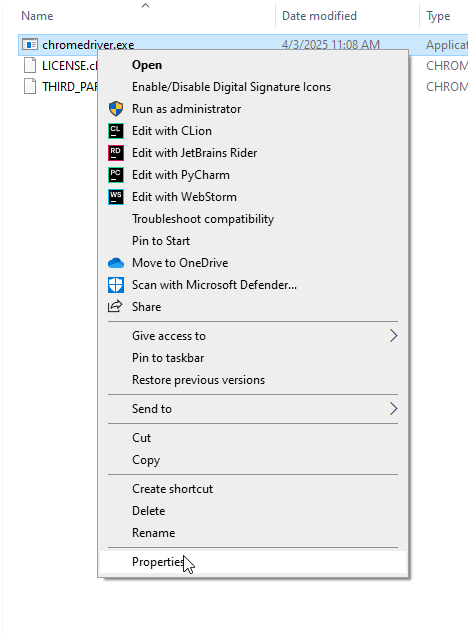

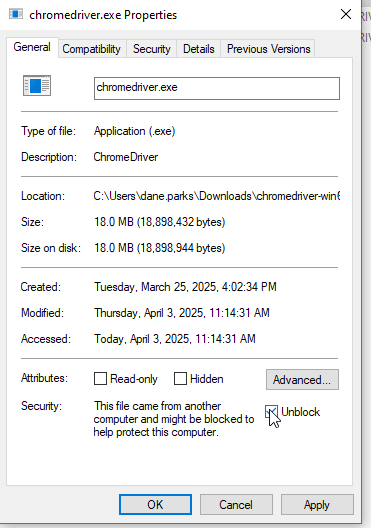

In [1]:
# Shows the version of selenium used
%pip show selenium | FINDSTR "Version"

Version: 4.32.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import re
import time
import json
import requests

from io import BytesIO
from PIL import Image
from pathlib import Path

In [3]:
os.getcwd()

'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\Notebooks'

In [4]:
# Assetwise password is stored in the parent directory under 'ASSETWISE_LOGIN'
with open('../secrets.json', 'r') as f:
    data = json.load(f)

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [8]:
driver = webdriver.Chrome()

In [9]:
driver.get("https://ohiodot-it.bentley.com")

In [10]:
# Wait until the login button appears, then select it
wait = WebDriverWait(driver, 10)  # Wait up to 10 seconds
login_button = wait.until(EC.element_to_be_clickable((By.ID, "showLocal")))
login_button.click()

In [11]:
WebDriverWait(driver, timeout=5).until(lambda d: d.find_element(By.ID, 'ContentPlaceHolder1_txtUserName'))
driver.find_element(By.ID, 'ContentPlaceHolder1_txtUserName').send_keys('dot.dparks1')
driver.find_element(By.ID, 'ContentPlaceHolder1_txtPassword').send_keys(data['ASSETWISE_LOGIN'])

input('This was used to create a pause in the script to solve captcha')

This was used to create a pause in the script to solve captcha 


''

In [12]:
sign_in_button = driver.find_element(By.ID, 'ContentPlaceHolder1_cmdSubmit')
sign_in_button.click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="ContentPlaceHolder1_cmdSubmit"]"}
  (Session info: chrome=136.0.7103.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7558ACF65+75717]
	GetHandleVerifier [0x00007FF7558ACFC0+75808]
	(No symbol) [0x00007FF755678F9A]
	(No symbol) [0x00007FF7556CF4C6]
	(No symbol) [0x00007FF7556CF77C]
	(No symbol) [0x00007FF755722577]
	(No symbol) [0x00007FF7556F73BF]
	(No symbol) [0x00007FF75571F39C]
	(No symbol) [0x00007FF7556F7153]
	(No symbol) [0x00007FF7556C0421]
	(No symbol) [0x00007FF7556C11B3]
	GetHandleVerifier [0x00007FF755BAD74D+3223469]
	GetHandleVerifier [0x00007FF755BA7CF2+3200338]
	GetHandleVerifier [0x00007FF755BC5B23+3322755]
	GetHandleVerifier [0x00007FF7558C6A3A+180890]
	GetHandleVerifier [0x00007FF7558CE13F+211359]
	GetHandleVerifier [0x00007FF7558B52B4+109332]
	GetHandleVerifier [0x00007FF7558B5462+109762]
	GetHandleVerifier [0x00007FF75589BA79+4825]
	BaseThreadInitThunk [0x00007FF81D3BE8D7+23]
	RtlUserThreadStart [0x00007FF81DFFC5DC+44]


In [13]:
sfn = '2590271'

In [14]:
# Search for a bridge by SFN
input_element = wait.until(
        EC.element_to_be_clickable((By.CLASS_NAME, "iui-input"))
    )

input_element.send_keys(sfn)

In [15]:
link_element = wait.until(
        EC.presence_of_element_located((By.XPATH, "//li[@class='iui-menu-item ']/a"))
    )
href_value = link_element.get_attribute("href")
print(f"Navigating to link: {href_value}")

driver.get(href_value)

Navigating to link: https://ohiodot-it.bentley.com/bridgedetail.aspx?type=0&as_id=79826


In [16]:
bridge_id = re.search(r"as_id=(\d+)", href_value).group(1)

In [17]:
bridge_id

'79826'

In [18]:
file_tab = wait.until(
        EC.presence_of_element_located((By.XPATH, "//span[text()='Files']"))
    )
file_tab.click()

#### Getting Sections of Photos

In [34]:
photo_section_list = driver.find_elements(By.CLASS_NAME, 'accordion-group')
next_but = driver.find_element(By.ID, "ctl01_ContentPlaceHolder1_fileMgr_rptFileTypes_ctl00_ft_container_lnkNext")

file_summary = {}

for e in photo_section_list:
    category_label = e.find_element(By.CLASS_NAME, 'accordion-text').text
    try:
        key, value = category_label.split(' (')
        value = int(value.strip(')'))
        file_summary[key] = value
            
    except:
        pass

    photos = e.find_elements(By.CLASS_NAME, 'FileInfo')
    photo_tally = len(photos)
    print(photo_tally, value)

    # Check if there are multiple pages of photos or not
    while photo_tally < value:
        next_but.click()
        photos = e.find_elements(By.CLASS_NAME, 'FileInfo')
        photo_tally += len(photos)
        print(photo_tally, value)

0 0
48 105
105 105
4 4
6 6
0 0
1 1
0 0
13 13
16 16
13 13
0 0
0 0
26 26
0 0
9 9
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
16 16
10 10
0 0
0 0
7 7
0 0
0 0
0 0
0 0
0 0


In [36]:
photo_tally

0

In [32]:
file_summary

{'Inspection Photo': 105,
 'Map': 4,
 'Drawings': 6,
 'Sketches and Field Measurements': 0,
 'BR 100 and Load Rating Files': 1,
 'Critical Finding Photos': 0,
 'Approach Inspection Photos': 13,
 'Channel Bed Sketches': 16,
 'Channel Inspection Photos': 13,
 'Culvert Inspection Photos': 0,
 'Culvert Shape': 0,
 'Deck Inspection Photos': 26,
 'Fracture Critical Inspection Procedure': 0,
 'General Elevation Photos': 9,
 'NDT Report': 1,
 'Historical Photos': 0,
 'Posting Signs': 0,
 'Scour Evaluation Report': 0,
 'Scour Assessment and Appraisal Document': 0,
 'Scour Critical Plan of Action': 0,
 'Shared Maintenance or Inspection Agreement': 0,
 'Signs/Utilities Inspection Photos': 2,
 'Substructure Inspection Photos': 16,
 'Superstructure Inspection Photos': 10,
 'Supplemental Inspection Photos': 0,
 'Underwater Inspection': 0,
 'Other File': 7,
 'Video': 0,
 'Audio': 0}

In [33]:
len(photos)

0

In [111]:
for photo in photos:
    print(photo.find_element(By.TAG_NAME, 'a').text)

WILL2924.JPG

PIC_01.jpg
IMGP1187.JPG
4860896_1.jpg
IMGP0153.JPG
PIC_01.jpg
IMGP1190.JPG
IMGP1189.JPG
IMGP1180.JPG
IMGP1186.JPG
IMGP1180.JPG
PIC_02.jpg
PIC_02.jpg
WILL2925.JPG
IMGP1179.JPG
WILL2926.JPG
PIC_03.jpg
IMGP1180.JPG
PIC_03.jpg
IMGP1181.JPG
PIC_04.jpg
PIC_04.jpg
WILL2927.JPG
WILL2928.JPG
IMGP1197.JPG
IMGP1198.JPG
PIC_05.jpg
IMGP1195.JPG
IMGP1216.JPG
IMGP1182.JPG
IMGP1199.JPG
IMGP1183.JPG
IMGP1200.JPG
IMGP1200.JPG
IMGP1201.JPG
IMGP1211.JPG
WILL2929.JPG
IMGP1203.JPG
IMGP1202.JPG
IMGP1179.JPG
IMGP1212.JPG
IMGP1184.JPG
IMGP1203.JPG
IMGP1214.JPG
IMGP1204.JPG
IMGP1180.JPG
IMGP1185.JPG


In [37]:
# Wait until the pagination container shows up
wait = WebDriverWait(driver, 2)
pagination_container = wait.until(
    EC.presence_of_element_located((By.ID, "divLinks"))
)

# A list to store all image links
all_image_links = []


def extract_image_links():
    """Optimized function to extract all image links on the page."""
    images = driver.find_elements(By.XPATH,
                                  "//div[@id='ctl01_ContentPlaceHolder1_fileMgr_rptFileTypes_ctl00_ft_container_FileRepeater']//img")
    return [img.get_attribute("datasrc") or img.get_attribute("src") for img in images]


while True:
    # Extract image links from the current page
    all_image_links.extend(extract_image_links())

    # Check if the "Next" button exists and is clickable
    try:
        next_button = wait.until(EC.element_to_be_clickable((By.ID, "lnkNext")))
        next_button.click()

        # Wait for the page container to reload
        wait.until(EC.invisibility_of_element_located((By.ID, "divLoadingSpinner")))
    except Exception:
        print("No more pages.")
        break

print(f"Total image links collected: {len(all_image_links)}")

# //TODO - Slow, refine this cell

No more pages.
Total image links collected: 9


In [38]:
len(all_image_links)

9

In [39]:
all_image_links = list(set(all_image_links))
len(all_image_links)

9

In [40]:
output_dir = r"C:\Users\dane.parks\OneDrive - Michael Baker International\Pictures\odot_inspection_photos"

for i, url in enumerate(all_image_links):
    # Correct the URL to download
    url = url.replace('~', 'https://ohiodot-it.bentley.com')
    url = url.replace('displaythumb', 'displayfile')

    # Wait until the <img> is available
    image_element = driver.find_element(By.TAG_NAME, "img")

    # Get the `src` attribute from the <img> tag
    image_src = image_element.get_attribute("src")

    # Obtain session id from Selenium cookies
    selenium_cookies = driver.get_cookies()
    cookies = {cookie['name']: cookie['value'] for cookie in selenium_cookies}
    
    # User agent must match user agent used to create session
    user_agent = driver.execute_script("return navigator.userAgent;")
    headers = {'User-Agent': user_agent}
    
    response = requests.get(url, cookies=cookies, headers=headers)
    image_data = BytesIO(response.content)
    image = Image.open(image_data)
    file_path = Path(output_dir) / f'image{i+1}.jpg'
    image.save(file_path)
    print(f"Downloaded {file_path} successfully")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dane.parks\\OneDrive - Michael Baker International\\Pictures\\odot_inspection_photos\\image1.jpg'